# DATA DIRI
- Nama: Muhammad Shodiq Fathoni
- Email: shodiqfathoni3@gmail.com
- Id Dicoding: shodiq29

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

In [ ]:
!mkdir /content/drive/MyDrive/setgw
!cp kaggle.json /content/drive/MyDrive/datasetgw/

In [5]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/datasetgw/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 87% 41.0M/47.0M [00:00<00:00, 57.7MB/s]
100% 47.0M/47.0M [00:00<00:00, 56.2MB/s]


In [7]:
!unzip \*.zip && rm *.zip.

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1010).jpg  
  inflating: Sh

In [49]:
os.listdir('/content/Shoe vs Sandal vs Boot Dataset')

['Shoe', 'Boot', 'Sandal']

## **membagi data set 80% train & 20% validation**

In [48]:
train_dir = os.path.join('/content/Shoe vs Sandal vs Boot Dataset')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


# **menampilkan sample ukuran resolusi gambar**

In [55]:
df = pd.DataFrame({'path': ['/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg',
                            '/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (1001).jpg',
                            '/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1010).jpg']})


for path in df['path']:
    image_name = Image.open(path)
    print(image_name.size)

(200, 256)
(150, 175)
(136, 102)


# **membuat model maxpooling layer**

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# **menerapkan callback akurasi 92%**

In [52]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 92!")
      self.model.stop_training = True
callbacks = myCallback()

In [41]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [44]:
num_epochs = 30
history = model.fit(train_generator,epochs=num_epochs,
                    validation_data=validation_generator,
                     batch_size=128,
                    steps_per_epoch=100,
                    validation_steps=5,
                    verbose=2,callbacks=[callbacks])

Epoch 1/30
100/100 - 6s - loss: 0.3605 - accuracy: 0.8675 - val_loss: 0.3059 - val_accuracy: 0.9250 - 6s/epoch - 60ms/step
Epoch 2/30
100/100 - 5s - loss: 0.3488 - accuracy: 0.8650 - val_loss: 0.4455 - val_accuracy: 0.8625 - 5s/epoch - 54ms/step
Epoch 3/30
100/100 - 6s - loss: 0.3294 - accuracy: 0.8650 - val_loss: 0.3136 - val_accuracy: 0.8625 - 6s/epoch - 61ms/step
Epoch 4/30
100/100 - 8s - loss: 0.3165 - accuracy: 0.8900 - val_loss: 0.3453 - val_accuracy: 0.8625 - 8s/epoch - 78ms/step
Epoch 5/30
100/100 - 6s - loss: 0.3397 - accuracy: 0.8687 - val_loss: 0.3997 - val_accuracy: 0.8375 - 6s/epoch - 56ms/step
Epoch 6/30
100/100 - 5s - loss: 0.2833 - accuracy: 0.8988 - val_loss: 0.4132 - val_accuracy: 0.8375 - 5s/epoch - 55ms/step
Epoch 7/30
100/100 - 8s - loss: 0.3085 - accuracy: 0.8863 - val_loss: 0.2727 - val_accuracy: 0.8625 - 8s/epoch - 80ms/step
Epoch 8/30
100/100 - 5s - loss: 0.2694 - accuracy: 0.8925 - val_loss: 0.2404 - val_accuracy: 0.9250 - 5s/epoch - 54ms/step
Epoch 9/30
100/1

## **membuat plot loss dan akurasi**

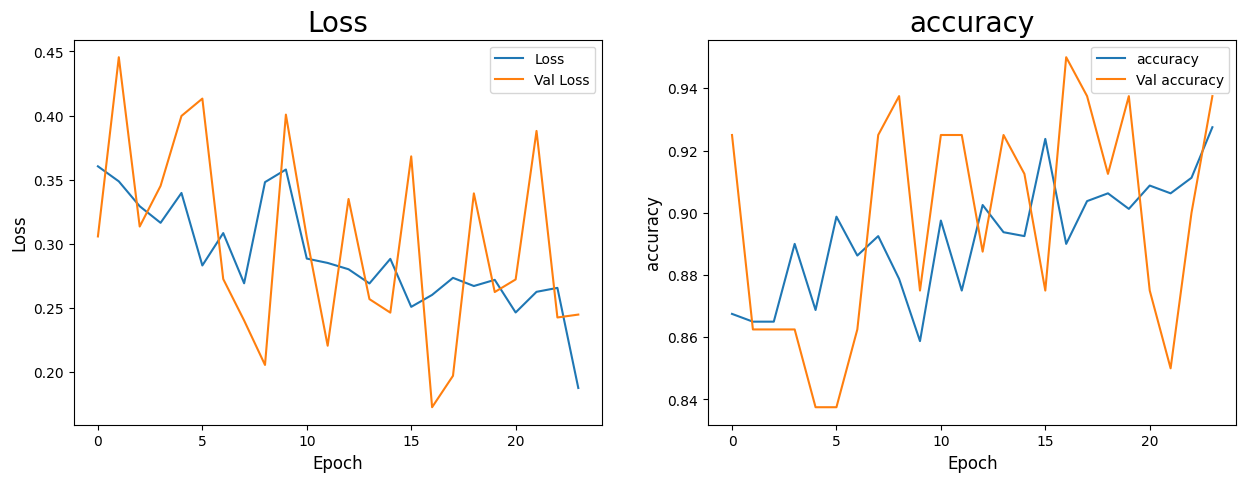

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss','Val Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MAE
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['accuracy','Val accuracy'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('accuracy', fontsize=12)
ax2.set_title('accuracy', fontsize=20)
plt.show()

## **Menulis kode untuk menyimpan model ke dalam format TF-Lite.**

In [56]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi shoe.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('shoe.tflite')
tflite_model_file.write_bytes(tflite_model)

38566116